pvalue_normal_approx(Binomial(100, 0.5), 60) = 0.04550026389635841
nulldist = Binomial(100, 1 / 3) = Binomial{Float64}(n=100, p=0.3333333333333333)
probability of P-value ≤ 5% = 0.055512


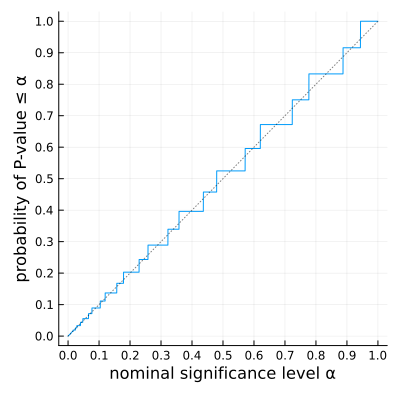

In [1]:
using Distributions
using Optim
using Roots
using StatsBase: ecdf
using StatsPlots
default(fmt=:png)

function pvalue_normal_approx(nulldist, x)
    m, s = mean(nulldist), std(nulldist)
    z = (x - m)/s
    2ccdf(Normal(), abs(z))
end

make_ecdf(Y) = (_ecdf = ecdf(Y); f(x) = _ecdf(x))

function plot_ecdf_pval(F_pval)
    plot(F_pval, 0, 1; label="")
    plot!(identity, 0, 1; label="", ls=:dot, c=:black, alpha=0.5)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="nominal significance level α",
        yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
end

@show pvalue_normal_approx(Binomial(100, 0.5), 60);

@show nulldist = Binomial(100, 1/3)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Binomial(100, 1 / 3) = Binomial{Float64}(n=100, p=0.3333333333333333)
altdist = Binomial(100, 1 / 2) = Binomial{Float64}(n=100, p=0.5)
probability of P-value ≤ 5% = 0.933745


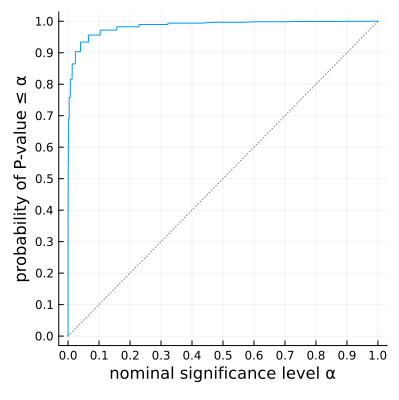

In [2]:
@show nulldist = Binomial(100, 1/3)
@show altdist = Binomial(100, 1/2)
X = rand(altdist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

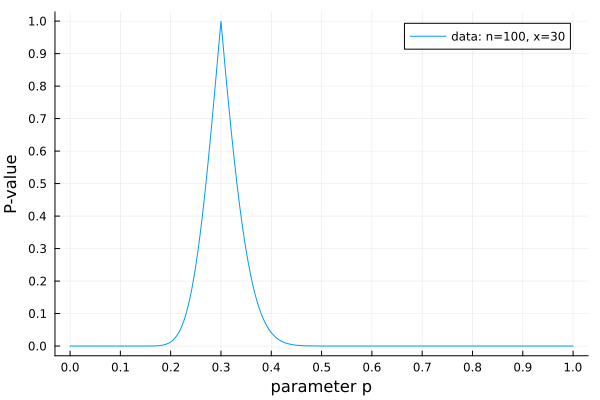

In [3]:
plot(p -> pvalue_normal_approx(Binomial(100, p), 30), 0, 1; label="data: n=100, x=30")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="parameter p", yguide="P-value")

nulldist = Binomial(n, p₀) = Binomial{Float64}(n=100, p=0.4)
p_value_of_null = 0.041226833337163676
confint95 = [0.2189488529493276, 0.39584854633346667]
point_estimate = 0.2999999990968664


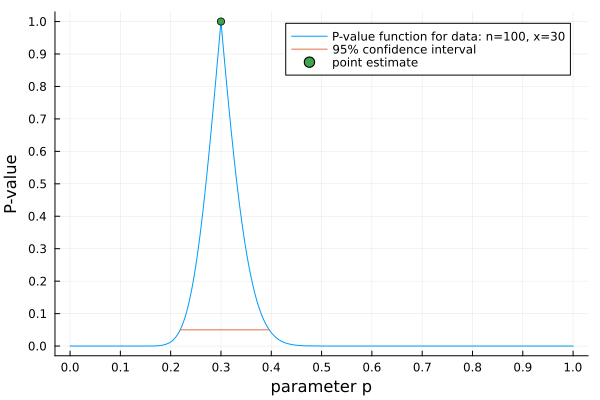

In [4]:
n, p₀ = 100, 0.4
@show nulldist = Binomial(n, p₀)

p_value_of_null = pvalue_normal_approx(nulldist, 30)

confint95 = find_zeros(p -> pvalue_normal_approx(Binomial(n, p), 30) - 0.05, 0, 1)

o = optimize(p -> -pvalue_normal_approx(Binomial(n, p), 30), 0, 1)
point_estimate = o.minimizer

@show p_value_of_null confint95 point_estimate

plot(p -> pvalue_normal_approx(Binomial(100, p), 30), 0, 1;
    label="P-value function for data: n=100, x=30")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="parameter p", yguide="P-value")
plot!(confint95, fill(0.05, 2); label="95% confidence interval")
scatter!([point_estimate], [1]; label="point estimate")

nulldist = Poisson(30) = Poisson{Float64}(λ=30.0)
probability of P-value ≤ 5% = 0.054235


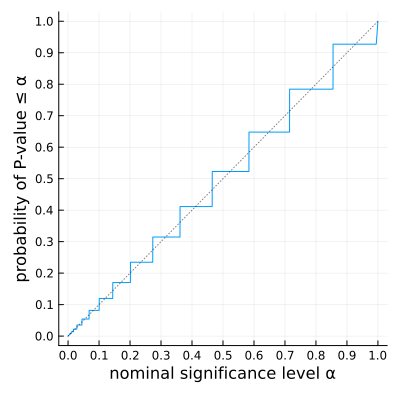

In [5]:
@show nulldist = Poisson(30)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Poisson(30) = Poisson{Float64}(λ=30.0)
altdist = Poisson(45) = Poisson{Float64}(λ=45.0)
probability of P-value ≤ 5% = 0.744205


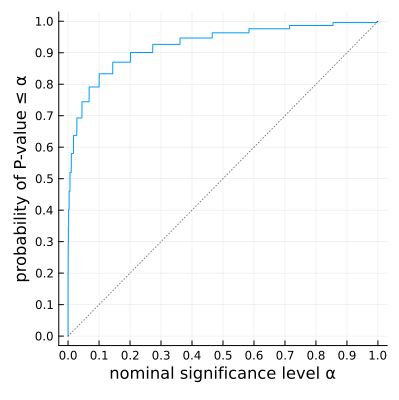

In [6]:
@show nulldist = Poisson(30)
@show altdist = Poisson(45)
X = rand(altdist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Poisson(30) = Poisson{Float64}(λ=30.0)
p_value_of_null = 0.06788915486182898
confint95 = [29.3769040649615, 54.46455475573262]
point_estimate = 40.00000026718285


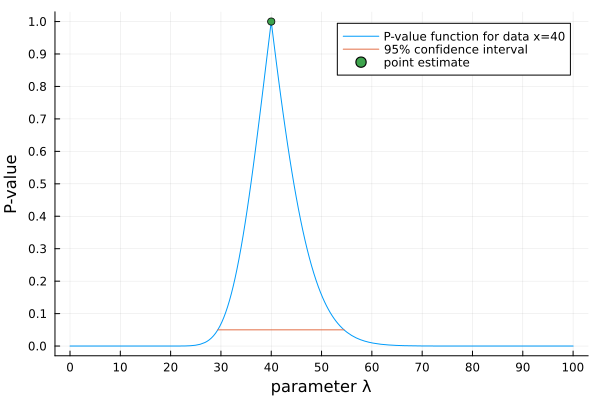

In [7]:
@show nulldist = Poisson(30)

p_value_of_null = pvalue_normal_approx(nulldist, 40)

confint95 = find_zeros(0.01, 100) do λ
    pvalue_normal_approx(Poisson(λ), 40) - 0.05
end

o = optimize(0.01, 100) do λ
    -pvalue_normal_approx(Poisson(λ), 40)
end
point_estimate = o.minimizer

@show p_value_of_null confint95 point_estimate

plot(λ -> pvalue_normal_approx(Poisson(λ), 40), 0.01, 100;
    label="P-value function for data x=40")
plot!(xtick=0:10:100, ytick=0:0.1:1)
plot!(xguide="parameter λ", yguide="P-value")
plot!(confint95, fill(0.05, 2); label="95% confidence interval")
scatter!([point_estimate], [1]; label="point estimate")

nulldist = NegativeBinomial(30, 0.7) = NegativeBinomial{Float64}(r=30.0, p=0.7)
probability of P-value ≤ 5% = 0.043778


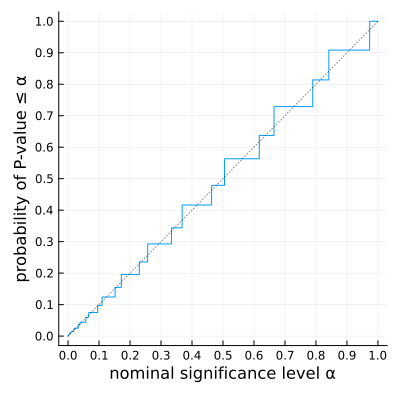

In [8]:
@show nulldist = NegativeBinomial(30, 0.7)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = NegativeBinomial(30, 0.7) = NegativeBinomial{Float64}(r=30.0, p=0.7)
altdist = NegativeBinomial(30, 0.5) = NegativeBinomial{Float64}(r=30.0, p=0.5)
probability of P-value ≤ 5% = 0.869236


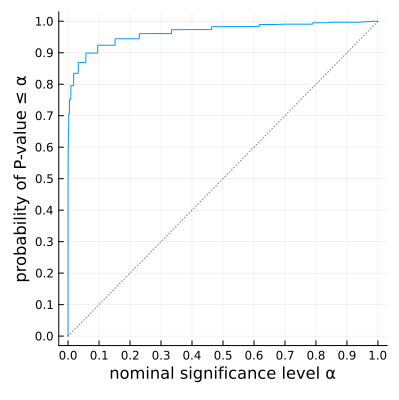

In [9]:
@show nulldist = NegativeBinomial(30, 0.7)
@show altdist = NegativeBinomial(30, 0.5)
X = rand(altdist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = NegativeBinomial(r, p₀) = NegativeBinomial{Float64}(r=30.0, p=0.7)
p_value_of_null = 0.09558070454562967
confint95 = [0.43921872604071077, 0.7146837681109597]
point_estimate = 0.6000000018329074


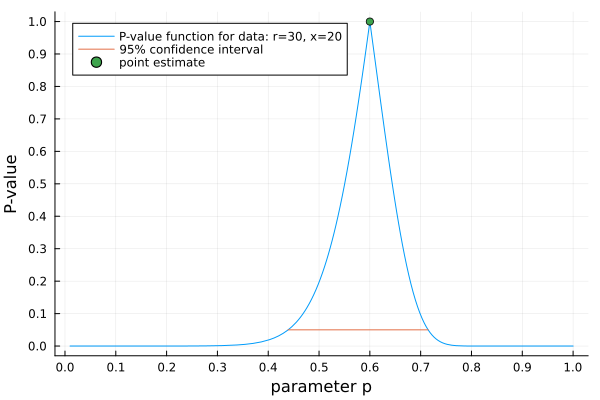

In [10]:
r, p₀ = 30, 0.7
@show nulldist = NegativeBinomial(r, p₀)

x = 20

p_value_of_null = pvalue_normal_approx(nulldist, x)

confint95 = find_zeros(0.01, 1) do p
    pvalue_normal_approx(NegativeBinomial(r, p), x) - 0.05
end

o = optimize(0.01, 1) do p
    -pvalue_normal_approx(NegativeBinomial(r, p), x)
end
point_estimate = o.minimizer

@show p_value_of_null confint95 point_estimate

plot(p -> pvalue_normal_approx(NegativeBinomial(r, p), x), 0.01, 1;
    label="P-value function for data: r=$r, x=$x")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="parameter p", yguide="P-value")
plot!(confint95, fill(0.05, 2); label="95% confidence interval")
scatter!([point_estimate], [1]; label="point estimate")
plot!(legend=:topleft)

A = [115 90; 80 110]
(a, b, c, d) = (115, 90, 80, 110)
(a / b) / (c / d) = 1.7569444444444442

nulldist = Hypergeometric(a + b, c + d, a + c) = Hypergeometric(ns=205, nf=190, n=195)
probability of P-value ≤ 5% = 0.055799


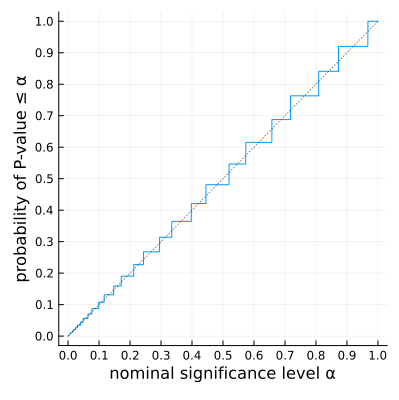

In [11]:
A = [
    115 90
    80 110
]
a, b, c, d = A'

@show A
@show a, b, c, d
@show (a/b)/(c/d)
println()

@show nulldist = Hypergeometric(a+b, c+d, a+c)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

A = [115 90; 80 110]
(a, b, c, d) = (115, 90, 80, 110)
(a / b) / (c / d) = 1.7569444444444442

nulldist = Hypergeometric(a + b, c + d, a + c) = Hypergeometric(ns=205, nf=190, n=195)
altdist = FisherNoncentralHypergeometric(a + b, c + d, a + c, 1.8) = FisherNoncentralHypergeometric{Float64}(ns=205, nf=190, n=195, ω=1.8)
probability of P-value ≤ 5% = 0.85194


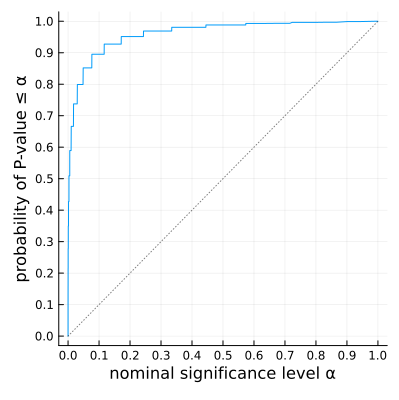

In [12]:
A = [
    115 90
    80 110
]
a, b, c, d = A'

@show A
@show a, b, c, d
@show (a/b)/(c/d)
println()

@show nulldist = Hypergeometric(a+b, c+d, a+c)
@show altdist = FisherNoncentralHypergeometric(a+b, c+d, a+c, 1.8)
X = rand(altdist, 10^5)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

A = [115 90; 80 110]
(a, b, c, d) = (115, 90, 80, 110)
(a / b) / (c / d) = 1.7569444444444442

nulldist = Hypergeometric(a + b, c + d, a + c) = Hypergeometric(ns=205, nf=190, n=195)
p_value_of_null = 0.005509811087663894
confint95 = [1.1788418902972688, 2.6109845120531876]
point_estimate = 1.7544067286377194


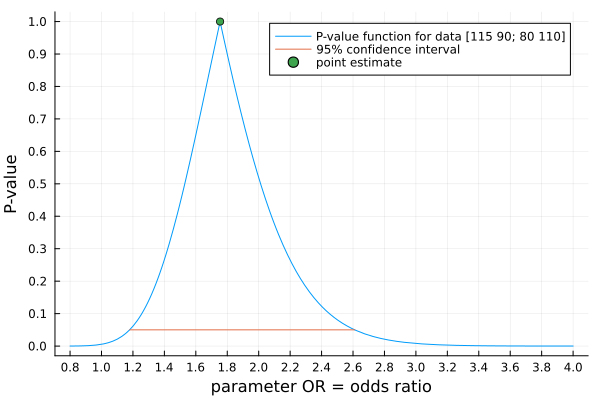

In [13]:
A = [
    115 90
    80 110
]
a, b, c, d = A'

@show A
@show a, b, c, d
@show (a/b)/(c/d)
println()

@show nulldist = Hypergeometric(a+b, c+d, a+c)
p_value_of_null = pvalue_normal_approx(Hypergeometric(a+b, c+d, a+c), a)

confint95 = find_zeros(0.1, 10) do OR
    pvalue_normal_approx(FisherNoncentralHypergeometric(a+b, c+d, a+c, OR), a) - 0.05
end

o = optimize(0.1, 10) do OR
    -pvalue_normal_approx(FisherNoncentralHypergeometric(a+b, c+d, a+c, OR), a)
end
point_estimate = o.minimizer

@show p_value_of_null confint95 point_estimate

plot(OR -> pvalue_normal_approx(FisherNoncentralHypergeometric(a+b, c+d, a+c, OR), 115), 0.8, 4;
    label="P-value function for data $A")
plot!(xtick=0:0.2:5, ytick=0:0.1:1)
plot!(xguide="parameter OR = odds ratio", yguide="P-value")
plot!(confint95, fill(0.05, 2); label="95% confidence interval")
scatter!([point_estimate], [1]; label="point estimate")